In [1]:
from sklearn.model_selection import train_test_split
from ISLP import load_data
from pandas.plotting import scatter_matrix
from scipy.stats import pointbiserialr
from sklearn.metrics import log_loss

In [2]:
df = load_data("Auto")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Part (a)
### Creating a binary variable mpg01 that contains 1 if value > median and 0 if value is less than median

In [4]:
median_mpg = df.mpg.median()
df["mpg01"] = df.mpg.apply(lambda x: 1 if x > median_mpg else 0)

In [5]:
# finding correlation matrix to see the top features having high correlation with mpg01
corr_matrix = df.corr()
corr_matrix["mpg01"].sort_values(ascending=False)

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_84555/1772096294.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>,
        <Axes: xlabel='mpg01', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>,
        <Axes: xlabel='mpg01', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlab

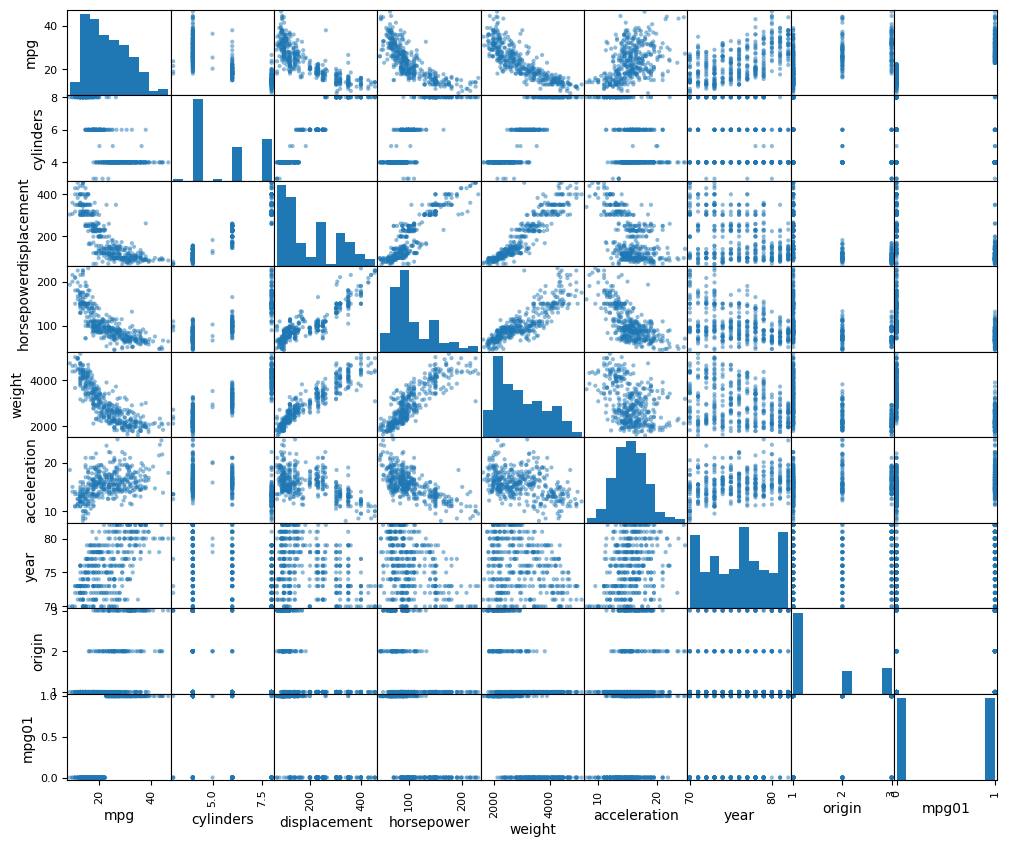

In [6]:
scatter_matrix(df, figsize=(12, 10))

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

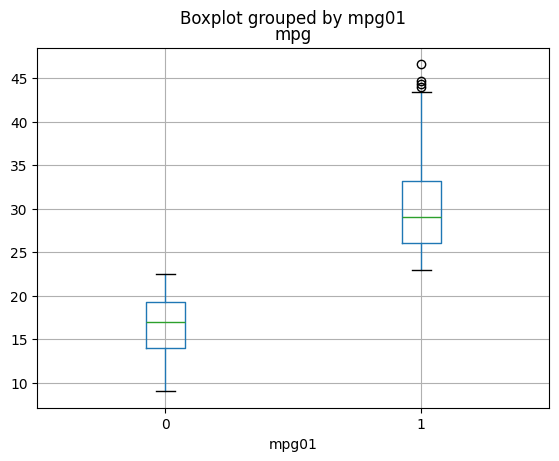

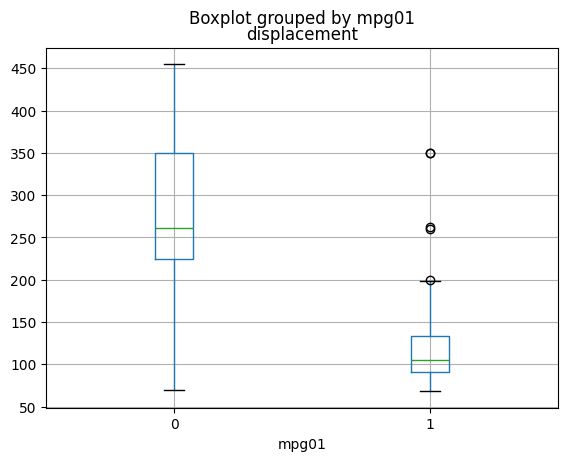

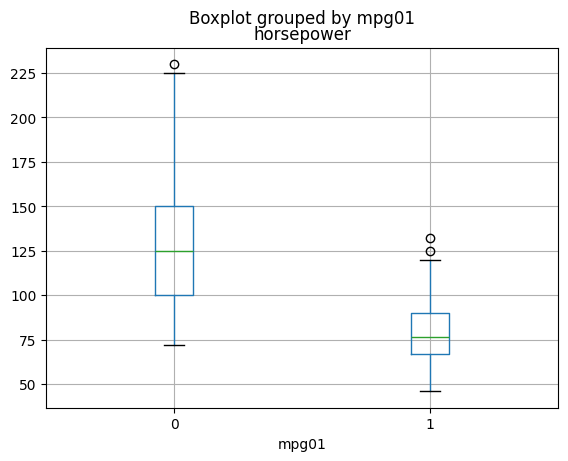

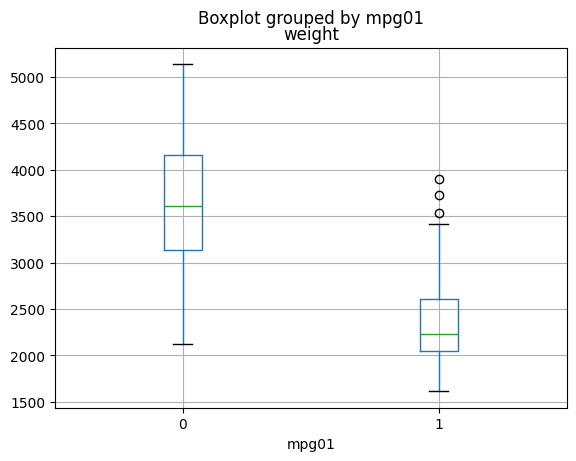

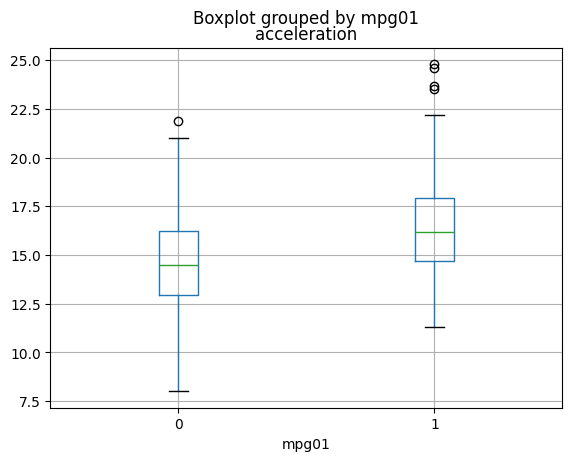

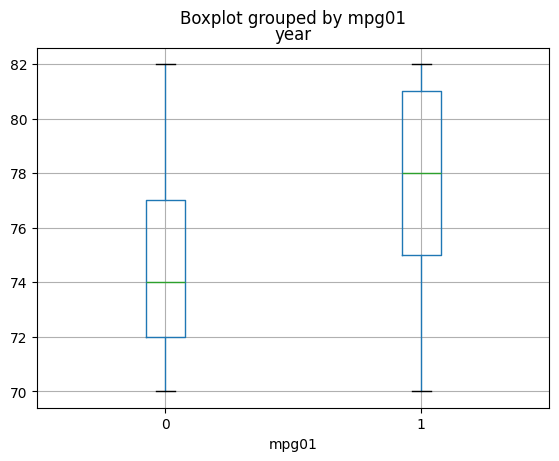

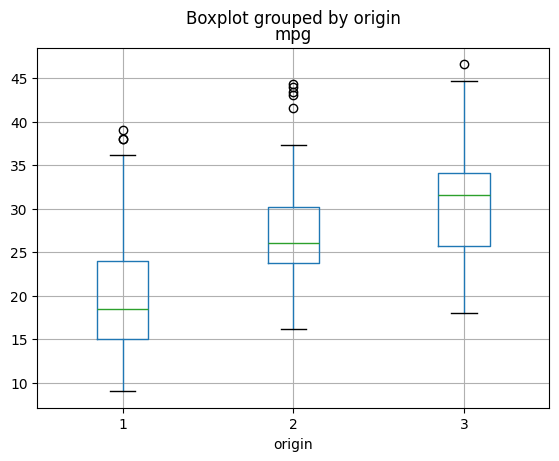

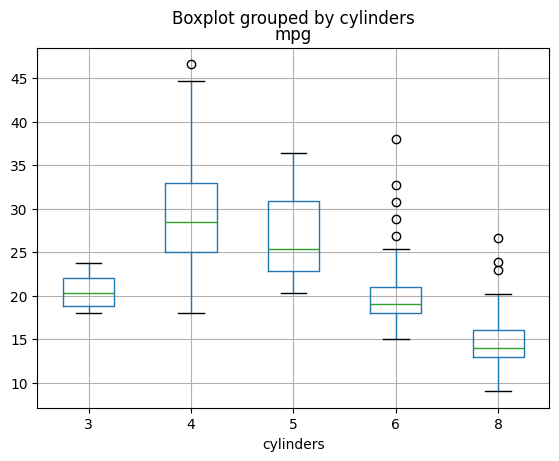

In [7]:
cols = ["mpg", "displacement", "horsepower", "weight", "acceleration", "year"]
for i in cols:
    df.boxplot(column=i, by="mpg01")
df.boxplot(column="mpg", by="origin")
df.boxplot(column="mpg", by="cylinders")

In [8]:
# Calculate a point biserial correlation coefficient and its p-value.
cols = ["mpg", "displacement", "horsepower", "weight", "acceleration", "year", "origin", "cylinders"]
for i in cols:
    print(f"{i} - {pointbiserialr(df['mpg01'], df[i])}")

mpg - SignificanceResult(statistic=0.8369392291536175, pvalue=3.886848002464326e-104)
displacement - SignificanceResult(statistic=-0.7534765935235879, pvalue=5.024074278850001e-73)
horsepower - SignificanceResult(statistic=-0.6670525810471593, pvalue=8.393893990426677e-52)
weight - SignificanceResult(statistic=-0.7577565714269795, pvalue=2.6416495123911556e-74)
acceleration - SignificanceResult(statistic=0.34682153008093436, pvalue=1.6030190025179079e-12)
year - SignificanceResult(statistic=0.42990422657492666, pvalue=4.599186789440775e-19)
origin - SignificanceResult(statistic=0.513698448318672, pvalue=8.844281686283769e-28)
cylinders - SignificanceResult(statistic=-0.7591938865422198, pvalue=9.689539998755503e-75)


# part (b) - Significance of each predictor for predicting "mpg01"

1. mpg - mpg01 is created using mpg, therefore both of them will be highly correlated.
2. displacement - A large engine displacement corresponds to a decrease in mpg(displacement and mpg are negatively correlated). Hence, a smaller value of displacement is likely to have mpg01 to be 1.
3. horsepower - A large engine horsepower corresponds to a decrease in mpg (horsepower and mpg are negatively correlated). Hence, a smaller value of horsepower is likely to have mpg01 to be 1.
4. weight - A large engine weight corresponds to a decrease in mpg (weight and mpg are negatively correlated). Hence, a smaller value of weight is likely to have mpg01 to be 1.
5. acceleration - A large acceleration corresponds to an increase in mpg (acceleration and mpg are positively correlated). Hence, a larger value of acceleration is likely to have mpg01 to be 1.
6. year - From the box-plots we can see that older cars have less mpg value, therefore mpg01 is 0 and latest cars have mpg01 = 1.
7. cylinders - We can see from the box-plot between cylinders and mpg, as the number of cylinders increases mpg values drops. (These to variables are negative correlated).
8. origin - From the observed data Japanese cars have more mpg compared to cars manufactured by american and europeans.

# part (c) - Train/Test Split

In [9]:
# scaling data before using them to predict
from sklearn.preprocessing import StandardScaler
new_df = df[["displacement", "horsepower", "weight", "cylinders"]]
sc_ds = StandardScaler()
sc_hp = StandardScaler()
sc_wt = StandardScaler()
new_df.loc[:,"displacement"] = sc_ds.fit_transform(df["displacement"].to_numpy().reshape(-1,1))
new_df.loc[:, "horsepower"] = sc_hp.fit_transform(df["horsepower"].to_numpy().reshape(-1,1))
new_df.loc[:, "weight"] = sc_wt.fit_transform(new_df["weight"].to_numpy().reshape(-1,1))

/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_84555/1906107018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,"displacement"] = sc_ds.fit_transform(df["displacement"].to_numpy().reshape(-1,1))
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_84555/1906107018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, "horsepower"] = sc_hp.fit_transform(df["horsepower"].to_numpy().reshape(-1,1))
/var/folders/3b/0dvqrth51nq0sk2f0plsr1s40000gn/T/ipykernel_84555/19

In [10]:
X = new_df[["displacement", "horsepower", "weight", "cylinders"]]
X_train, X_test, y_train, y_test = train_test_split(X, df["mpg01"], test_size=0.2, random_state=42)

# part(d) - Training Logistic regression model and then calculating test error

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
y_pred = log_reg.predict_proba(X_test)
print(f"Test error of logistic regression model - {log_loss(y_test, y_pred)}")

Test error of logistic regression model - 0.2858179600739487


# part(e) - Training LDA model and then calculating test error

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
y_pred = lda_model.predict_proba(X_test)
print(f"Test error of LDA - {log_loss(y_test, y_pred)}")

Test error of LDA - 0.3740997580146023


# part(f) - Training QDA model and then calculating test error

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [16]:
y_pred = qda_model.predict_proba(X_test)
print(f"Test error of QDA - {log_loss(y_test, y_pred)}")

Test error of QDA - 0.32873479641866543


# part(e) - Training KNN classifier and then calculating test error

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k = list(range(1, 20))
test_errors = []
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict_proba(X_test)
    test_errors.append(log_loss(y_test, y_pred))

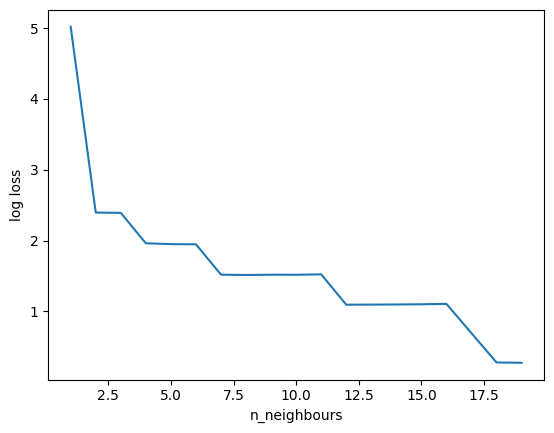

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("n_neighbours")
plt.ylabel("log loss")
plt.plot(k, test_errors)

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
k = list(range(1, 20))
validation_errors = []
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    validation_errors.append(cross_val_score(knn_model, X_train, y_train, cv=3))
print(f"KNN model with {np.argmin(np.mean(validation_errors, axis=1)) + 1} neighbours performs best on the dataset.")

KNN model with 2 neighbours performs best on the dataset.
